### Import some packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data
File available from https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center

In [2]:
pd.read_csv("TransfusionData.csv")

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [3]:
df = pd.read_csv("TransfusionData.csv")

In [4]:
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [5]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

### Rename last column to shorter name

In [6]:
dfr = df.rename(columns={'whether he/she donated blood in March 2007':'March 2007 donation'})

### Assess possible correlations between features
It is can be seen below that Monetary and Frequency are strongly correlated. In fact closer examination of data shows that one donation is 250cc. Thus $Monetary = 250 * Frequency$, hence the perfect linear relationship with 0 intercept.

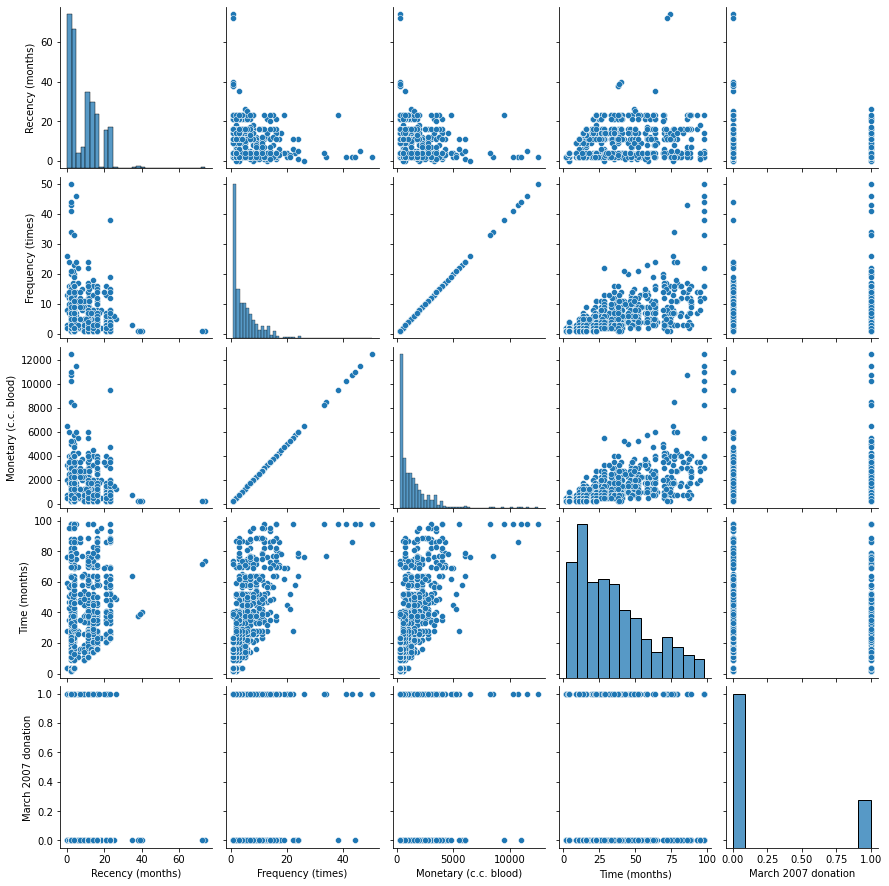

In [7]:
sns.pairplot(dfr)
plt.show()

### Construct feature matrix
Define two sets of features: one with all features, the other w/o Monetary 

In [8]:
features = ['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']
features_wo_monetary = ['Recency (months)','Frequency (times)','Time (months)']
X = dfr.loc[:,features_wo_monetary].values
X

array([[ 2, 50, 98],
       [ 0, 13, 28],
       [ 1, 16, 35],
       ...,
       [23,  3, 62],
       [39,  1, 39],
       [72,  1, 72]], dtype=int64)

### Construct target vector

In [9]:
target = 'March 2007 donation'
y = dfr[target].values
y

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
print(f"Fraction of 'donated': {y.sum()/y.size*100} %")

Fraction of 'donated': 23.796791443850267 %


### Split data into train+val (4/5) and test (1/5) subsets 

In [11]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=148, random_state=42)
print(f'X_train_val size: {len(y_train_val)}')
print(f'X_test set size: {len(y_test)}')

X_train_val size: 600
X_test set size: 148


### Rescale train+val set

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_val)
X_train_val_r = scaler.transform(X_train_val)
X_train_val_r

array([[ 0.17735159, -0.438236  ,  0.08381565],
       [-1.02503209,  0.55775491,  0.64841187],
       [-0.06312514,  0.88975188,  0.56775526],
       ...,
       [ 0.77854344,  0.88975188,  0.20480056],
       [ 0.77854344,  0.22575794,  2.34220051],
       [-0.66431699,  0.55775491,  0.20480056]])

### Rescale test set with $\mu$ and $\sigma$ from train+val

In [13]:
X_test_r = scaler.transform(X_test)
X_test_r

array([[-9.04793722e-01, -7.70232967e-01, -1.32767488e+00],
       [ 7.78543435e-01,  5.97594543e-02,  2.04800555e-01],
       [-6.64316985e-01,  5.97594543e-02,  3.15905025e-03],
       [ 1.77351593e-01, -6.04234483e-01, -9.64720175e-01],
       [ 5.38066698e-01, -6.04234483e-01, -8.43735272e-01],
       [-6.31251434e-02, -4.38235998e-01,  6.88740168e-01],
       [ 1.77351593e-01, -4.38235998e-01, -2.79139057e-01],
       [-9.04793722e-01, -7.70232967e-01, -1.32767488e+00],
       [-9.04793722e-01,  1.55374581e+00,  1.17267978e+00],
       [ 1.62021201e+00, -7.70232967e-01, -4.80780562e-01],
       [-6.64316985e-01,  5.57754907e-01,  1.24143953e-01],
       [-6.64316985e-01, -1.06239030e-01,  1.57596279e+00],
       [ 5.38066698e-01, -2.72237514e-01, -5.21108863e-01],
       [ 1.37973528e+00, -6.04234483e-01,  6.88740168e-01],
       [-6.64316985e-01, -7.70232967e-01, -1.24701828e+00],
       [-7.84555354e-01, -6.04234483e-01, -4.80780562e-01],
       [-6.64316985e-01,  2.25757939e-01

### Split train (4/5) / val (1/5)

In [14]:
X_train_r, X_val_r, y_train, y_val = train_test_split(
    X_train_val_r, y_train_val, test_size=120, random_state=42)

print(f'X_train size: {len(y_train)}')
print(f'X_val   size: {len(y_val)}')

X_train size: 480
X_val   size: 120


### Train logistic regression model on full train set

In [15]:
from sklearn.linear_model import LogisticRegression

simple_clf = LogisticRegression()
simple_clf.fit(X_train_r, y_train)

LogisticRegression()

### Score of classifier

In [26]:
from sklearn.metrics import f1_score, precision_score, recall_score

#print(f"Accuracy (training)  : {simple_clf.score(X_train_r, y_train)}")
#print(f"Accuracy (validation): {simple_clf.score(X_val_r, y_val)}")
print(f"F1 score  (training): {f1_score(y_train, simple_clf.predict(X_train_r))}")
print(f"Precision (training): {precision_score(y_train, simple_clf.predict(X_train_r))}")
print(f"Recall    (training): {recall_score(y_train, simple_clf.predict(X_train_r))}")

F1 score  (training): 0.17322834645669294
Precision (training): 0.6470588235294118
Recall    (training): 0.1


In [17]:
y_pred = simple_clf.predict(X_test_r)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Confusion matrix

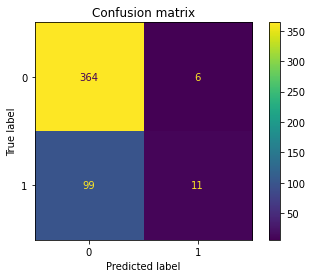

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(simple_clf, X_train_r, y_train)
plt.title('Confusion matrix')
plt.show()

### Train logistic regression on train set with varied size
Conclusion: LogReg is perhaps not the best choice of model as already suggested by the confusion matrix

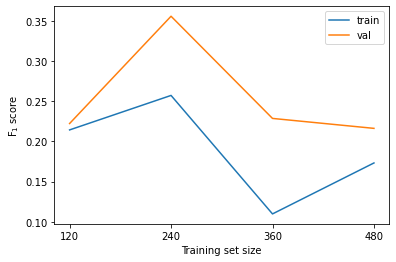

In [27]:
import numpy as np

train_set_number = 0
#f1_score_partial = []
f1_score_partial = np.empty([4,2])

for train_length in range(120,600,120):
    #train_set_number += 1
    X_train_r_partial = X_train_r[:train_length,:]
    y_train_partial = y_train[:train_length]

    simple_clf.fit(X_train_r_partial, y_train_partial)
    #print(f'Training set number     : {train_set_number}')
    #print(f'Shape of X_train partial: {X_train_r_partial.shape}')
    #print(f'Shape of y_train partial: {y_train_partial.shape}')
    #print(f"F1-score (training)     : {f1_score(y_train_partial, simple_clf.predict(X_train_r_partial))}")
    #print(f"F1-score (validation)   : {f1_score(y_val, simple_clf.predict(X_val_r))}")
    #f1_score_partial.append(f1_score(y_train_partial,simple_clf.predict(X_train_r_partial)))
    f1_score_partial[train_set_number,0] = f1_score(y_train_partial,simple_clf.predict(X_train_r_partial))
    f1_score_partial[train_set_number,1] = f1_score(y_val,simple_clf.predict(X_val_r))
    train_set_number += 1
    
plt.plot(np.arange(120,481,120),f1_score_partial)
plt.legend(['train','val'])
plt.xlabel('Training set size')
plt.ylabel(f'F$_1$ score')
plt.xticks(np.arange(120,481,120))
plt.show()

### Cross-validation calculation (for fun) after rescaling full set

In [95]:
# Make sure correct set is used 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=148, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_val)
X_train_val_r = scaler.transform(X_train_val)

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(simple_clf, X_train_val_r, y_train_val, cv=5, scoring='f1')
print(cv_scores)

[0.125      0.17142857 0.28571429 0.1875     0.24242424]


### Run regularization
Regularization makes things worse

In [96]:
# Give it a try
simple_clf = LogisticRegression(C=0.1)
simple_clf.fit(X_train_val_r, y_train_val)
print(f1_score(y_train_val,simple_clf.predict(X_train_val_r)))

# Perform Grid Search CV
from sklearn.model_selection import GridSearchCV

params = {'C': [0.01, 0.1, 1.0]}
simple_clf = LogisticRegression()
simple_clf_cv = GridSearchCV(simple_clf, params, cv=6, scoring='f1')
simple_clf_cv.fit(X_train_val_r, y_train_val)
simple_clf_cv.cv_results_
#simple_clf_cv.best_score_

0.15286624203821655


{'mean_fit_time': array([0.01411867, 0.00629711, 0.01301825]),
 'std_fit_time': array([0.00674775, 0.00699084, 0.00582194]),
 'mean_score_time': array([0.        , 0.00261243, 0.        ]),
 'std_score_time': array([0.        , 0.00584158, 0.        ]),
 'param_C': masked_array(data=[0.01, 0.1, 1.0],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1.0}],
 'split0_test_score': array([0.        , 0.08333333, 0.14814815]),
 'split1_test_score': array([0.08333333, 0.07692308, 0.14814815]),
 'split2_test_score': array([0.08      , 0.07142857, 0.2       ]),
 'split3_test_score': array([0.08      , 0.15384615, 0.28571429]),
 'split4_test_score': array([0.08      , 0.07692308, 0.14814815]),
 'split5_test_score': array([0.        , 0.28571429, 0.28571429]),
 'mean_test_score': array([0.05388889, 0.12469475, 0.2026455 ]),
 'std_test_score': array([0.03812342, 0.0773406 , 0.06153282]),
 'rank_test_score': arr

### ROC curve for model

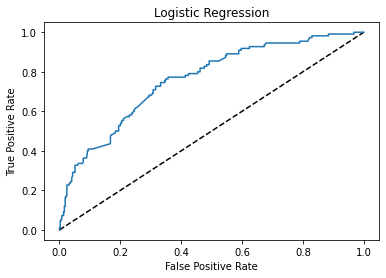

In [22]:
from sklearn.metrics import roc_curve

y_pred_prob = simple_clf.predict_proba(X_train_r)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

### Calculate ROC AUC score

In [23]:
from sklearn.metrics import roc_auc_score
print(f'ROC AUC score: {roc_auc_score(y_train, y_pred_prob)}')

ROC AUC score: 0.7597420147420147
